# Company Data

* Assignment

* About the data: Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:  Sales -- Unit sales (in thousands) at each location  Competitor Price -- Price charged by competitor at each location  Income -- Community income level (in thousands of dollars)  Advertising -- Local advertising budget for company at each location (in thousands of dollars)  Population -- Population size in region (in thousands)  Price -- Price company charges for car seats at each site  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site  Age -- Average age of the local population  Education -- Education level at each location  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location  US -- A factor with levels No and Yes to indicate whether the store is in the US or not The company dataset looks like this:

* Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# Loading Dataset
data = pd.read_csv('Company_Data.csv')

# EDA & Data Preprocessing

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
338,5.97,112,24,0,164,101,Medium,45,11,Yes,No
180,4.94,137,112,15,434,149,Bad,66,13,Yes,Yes
190,8.79,130,37,13,297,101,Medium,37,13,No,Yes
94,8.39,115,97,5,134,84,Bad,55,11,Yes,Yes
264,6.95,128,29,5,324,159,Good,31,15,Yes,Yes
255,7.71,123,81,8,198,81,Bad,80,15,Yes,Yes
262,6.37,120,77,15,86,132,Medium,48,18,Yes,Yes
340,7.50,140,29,0,105,91,Bad,43,16,Yes,No
78,4.43,134,48,1,139,145,Medium,65,12,Yes,Yes
66,8.85,127,92,0,508,91,Medium,56,18,Yes,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


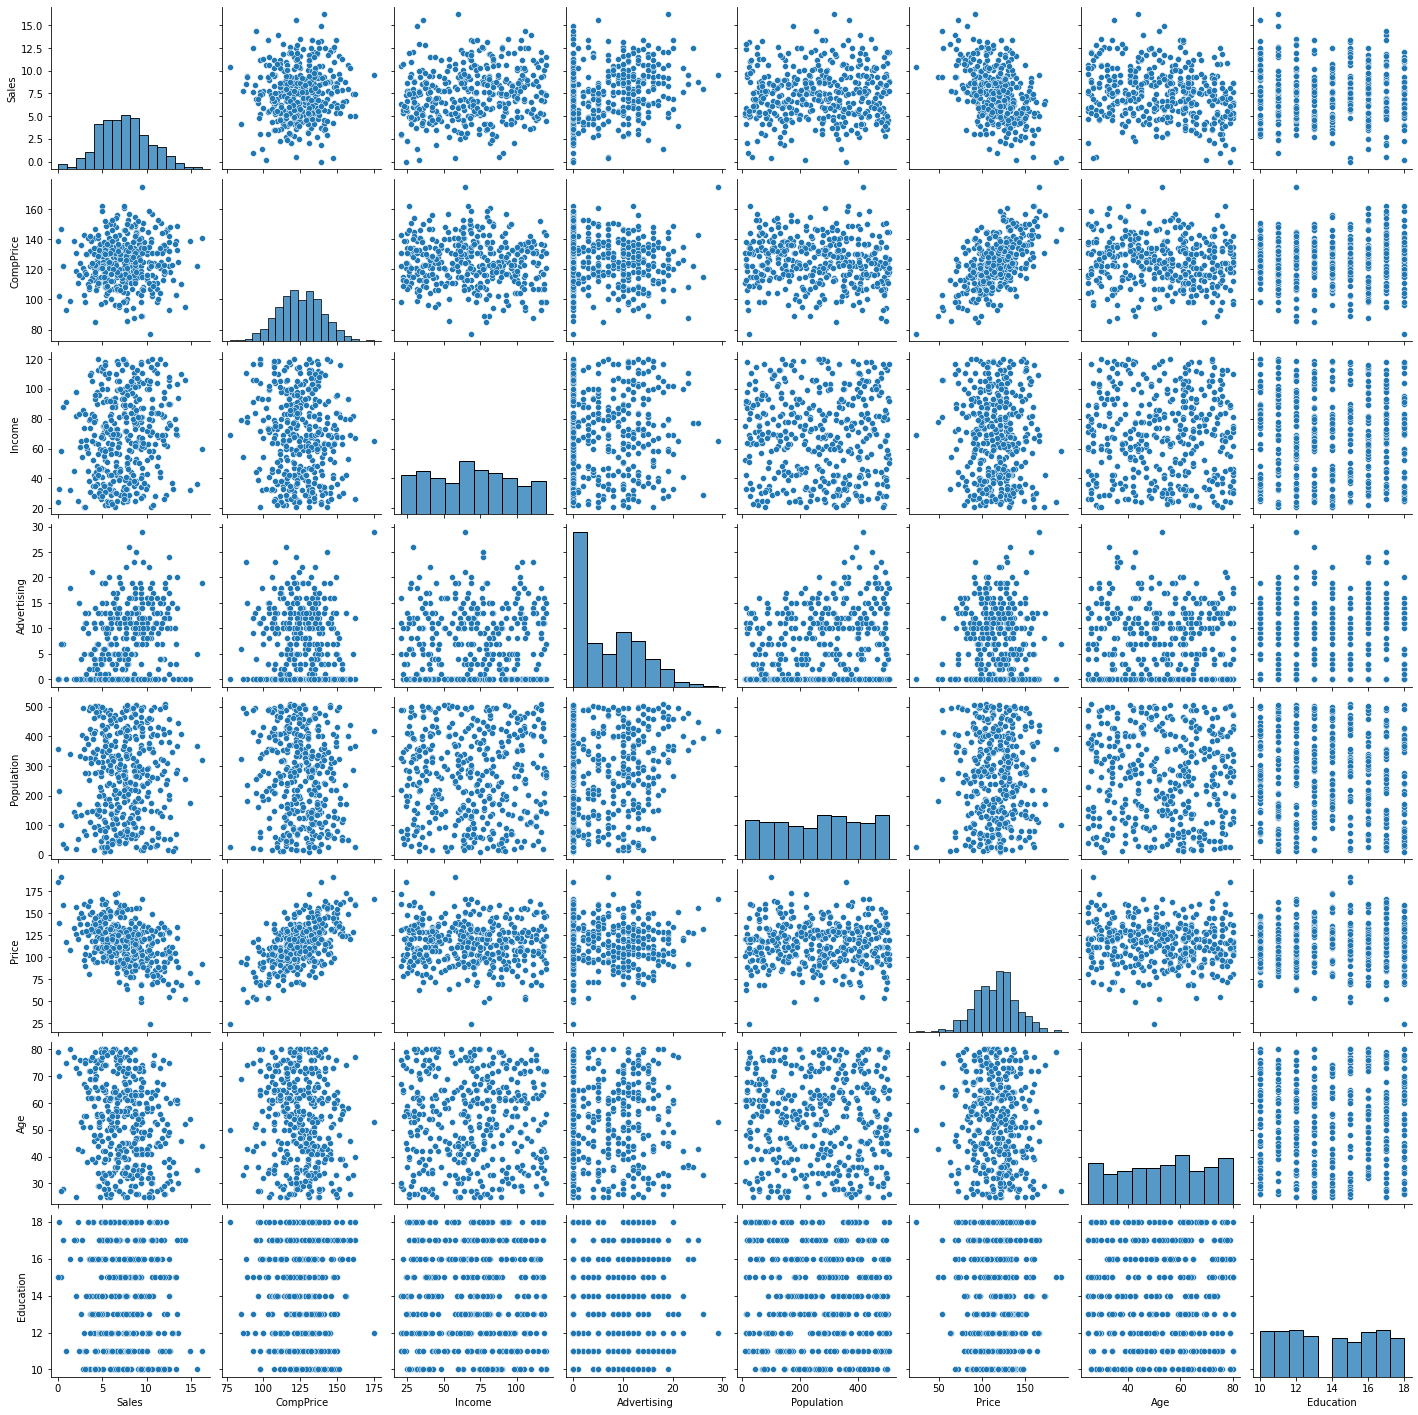

In [8]:
# pairplot
import seaborn as sns
sns.pairplot(data)

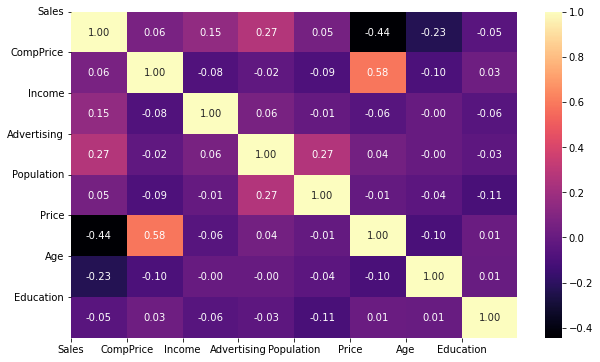

In [9]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


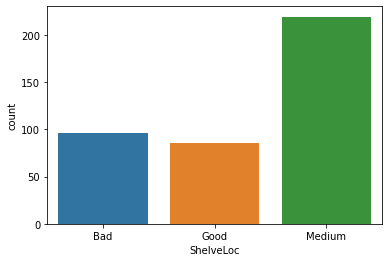

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


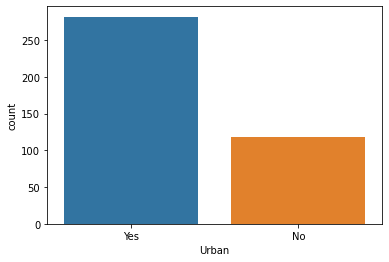

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


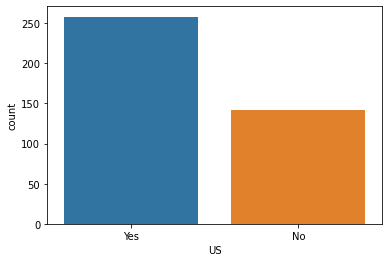

In [10]:
# checking count of categories for categorical columns colums
sns.countplot(data['ShelveLoc'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

sns.countplot(data['US'])
plt.show()

In [11]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

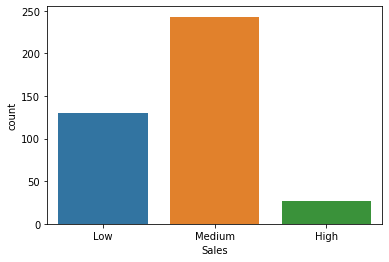

In [12]:
sns.countplot(data['Sales'])

In [13]:
data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [15]:
# Converting other attributes into categories
data['CompPrice'] = pd.cut(x=data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

data['Income'] = pd.cut(x=data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

data['Advertising'] = pd.cut(x=data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

data['Population'] = pd.cut(x=data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

data['Price'] = pd.cut(x=data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

data['Age'] = pd.cut(x=data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

data['Education'] = pd.cut(x=data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [16]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No


In [17]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Sales'] = label_encoder.fit_transform(data['Sales'])
data['CompPrice'] = label_encoder.fit_transform(data['CompPrice'])
data['Income'] = label_encoder.fit_transform(data['Income'])
data['Advertising'] = label_encoder.fit_transform(data['Advertising'])
data['Population'] = label_encoder.fit_transform(data['Population'])
data['Price'] = label_encoder.fit_transform(data['Price'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [19]:
# Dividing data into independent variables and dependent variable
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [20]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [21]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [23]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

In [24]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,2,1,1,2,2,0,0,2,0,0
177,0,0,1,1,2,2,1,0,1,1
119,2,0,1,1,2,2,0,1,1,1
194,2,0,2,0,2,2,2,1,1,1
229,1,0,1,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,0,2,2,1,0,2,2,0,0,1
106,2,1,1,2,0,2,0,0,0,0
270,2,1,1,2,2,1,1,1,1,0
348,2,0,0,0,2,1,2,1,1,1


In [25]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,1,1,2,2,2,0,0,1,0,1
280,2,0,2,0,0,0,2,1,1,1
33,2,1,2,2,2,1,2,0,1,1
210,2,1,1,0,2,0,2,2,0,1
93,0,1,1,1,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
332,2,1,0,0,2,2,0,1,1,1
167,2,0,1,2,2,2,0,2,1,0
245,2,1,1,2,2,1,2,1,0,1
311,0,2,2,2,2,0,2,2,1,1


In [26]:
y_train

258    1
177    2
119    2
194    2
229    2
      ..
71     2
106    1
270    2
348    0
102    1
Name: Sales, Length: 268, dtype: int32

In [27]:
y_test

209    1
280    1
33     2
210    1
93     2
      ..
332    1
167    2
245    2
311    2
145    2
Name: Sales, Length: 132, dtype: int32

# Building model based on C5.0 Algorithm

In [28]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

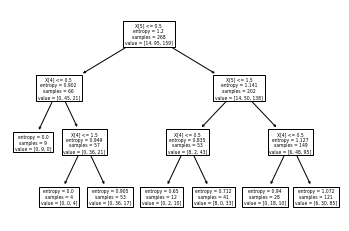

In [29]:
# Plotting Decision tree
tree.plot_tree(model_c5);

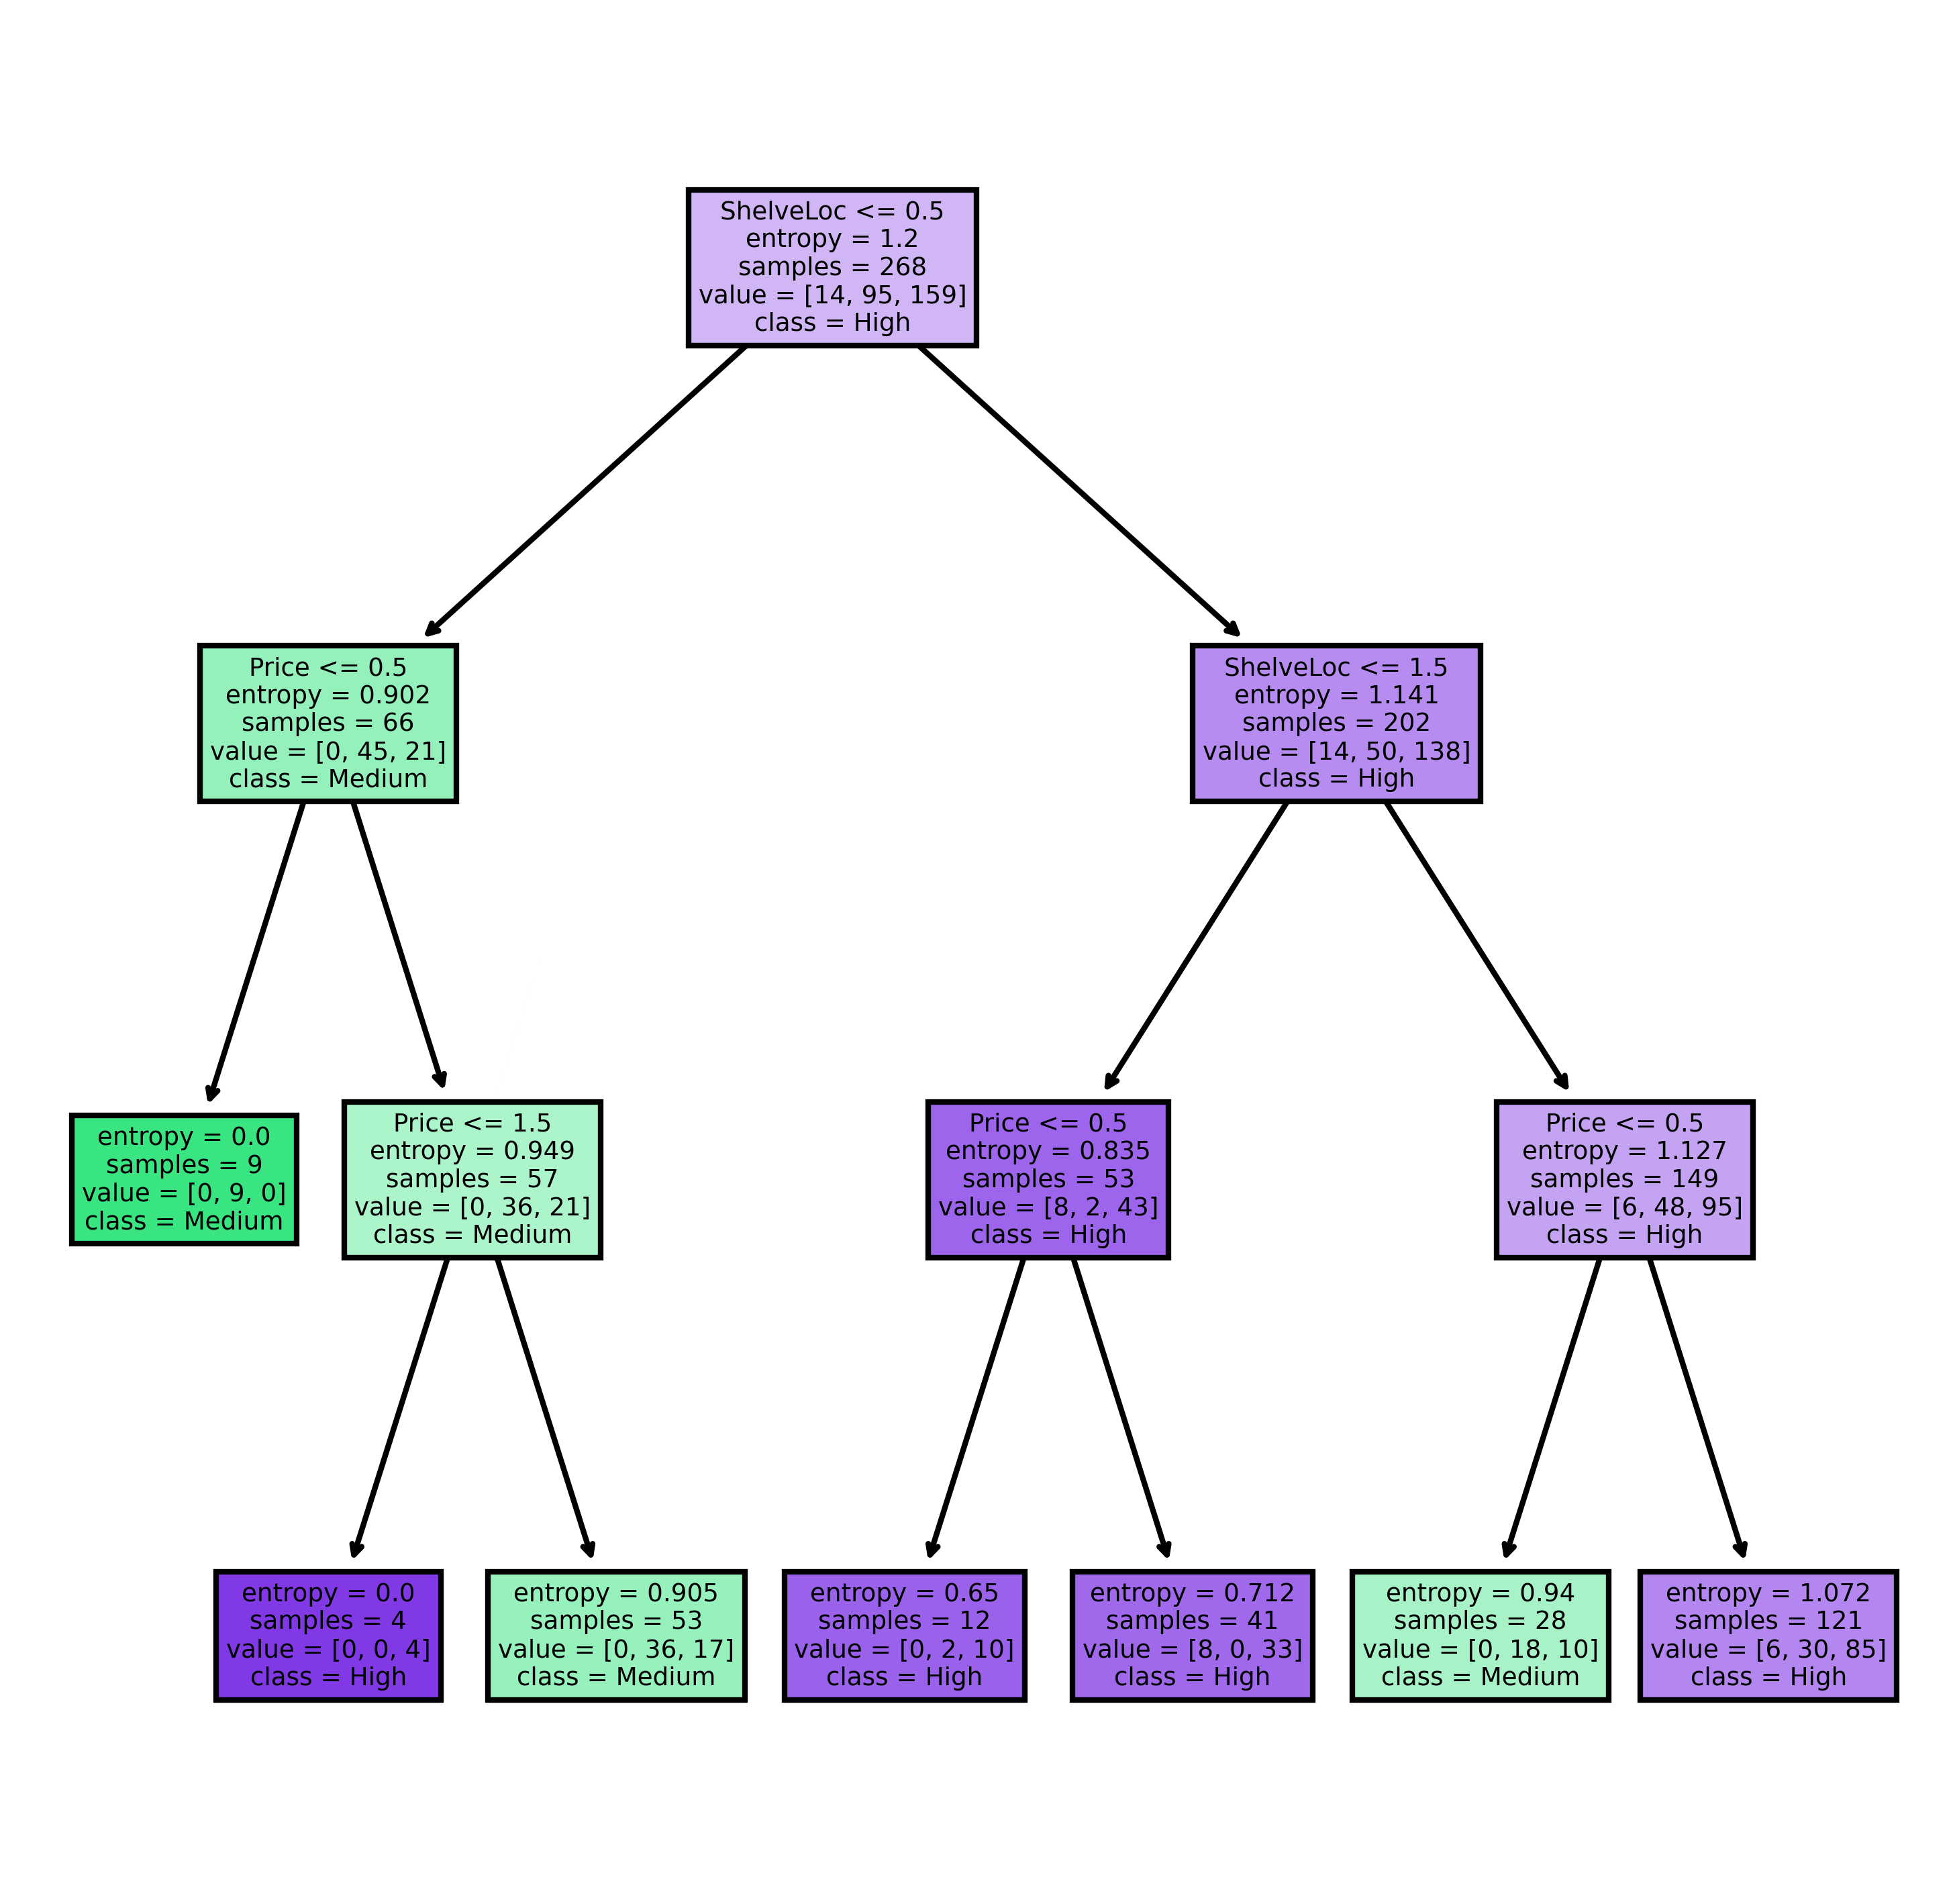

In [30]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

2    94
1    38
dtype: int64

In [32]:
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [33]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,1,2
Sales,,
0,0,13
1,22,13
2,16,68


In [34]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6818181818181818

# Building model based on CART Algorithm

In [35]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

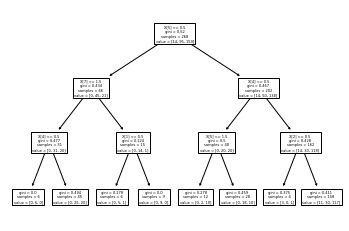

In [36]:
# Plotting Decision tree
tree.plot_tree(model_CART);

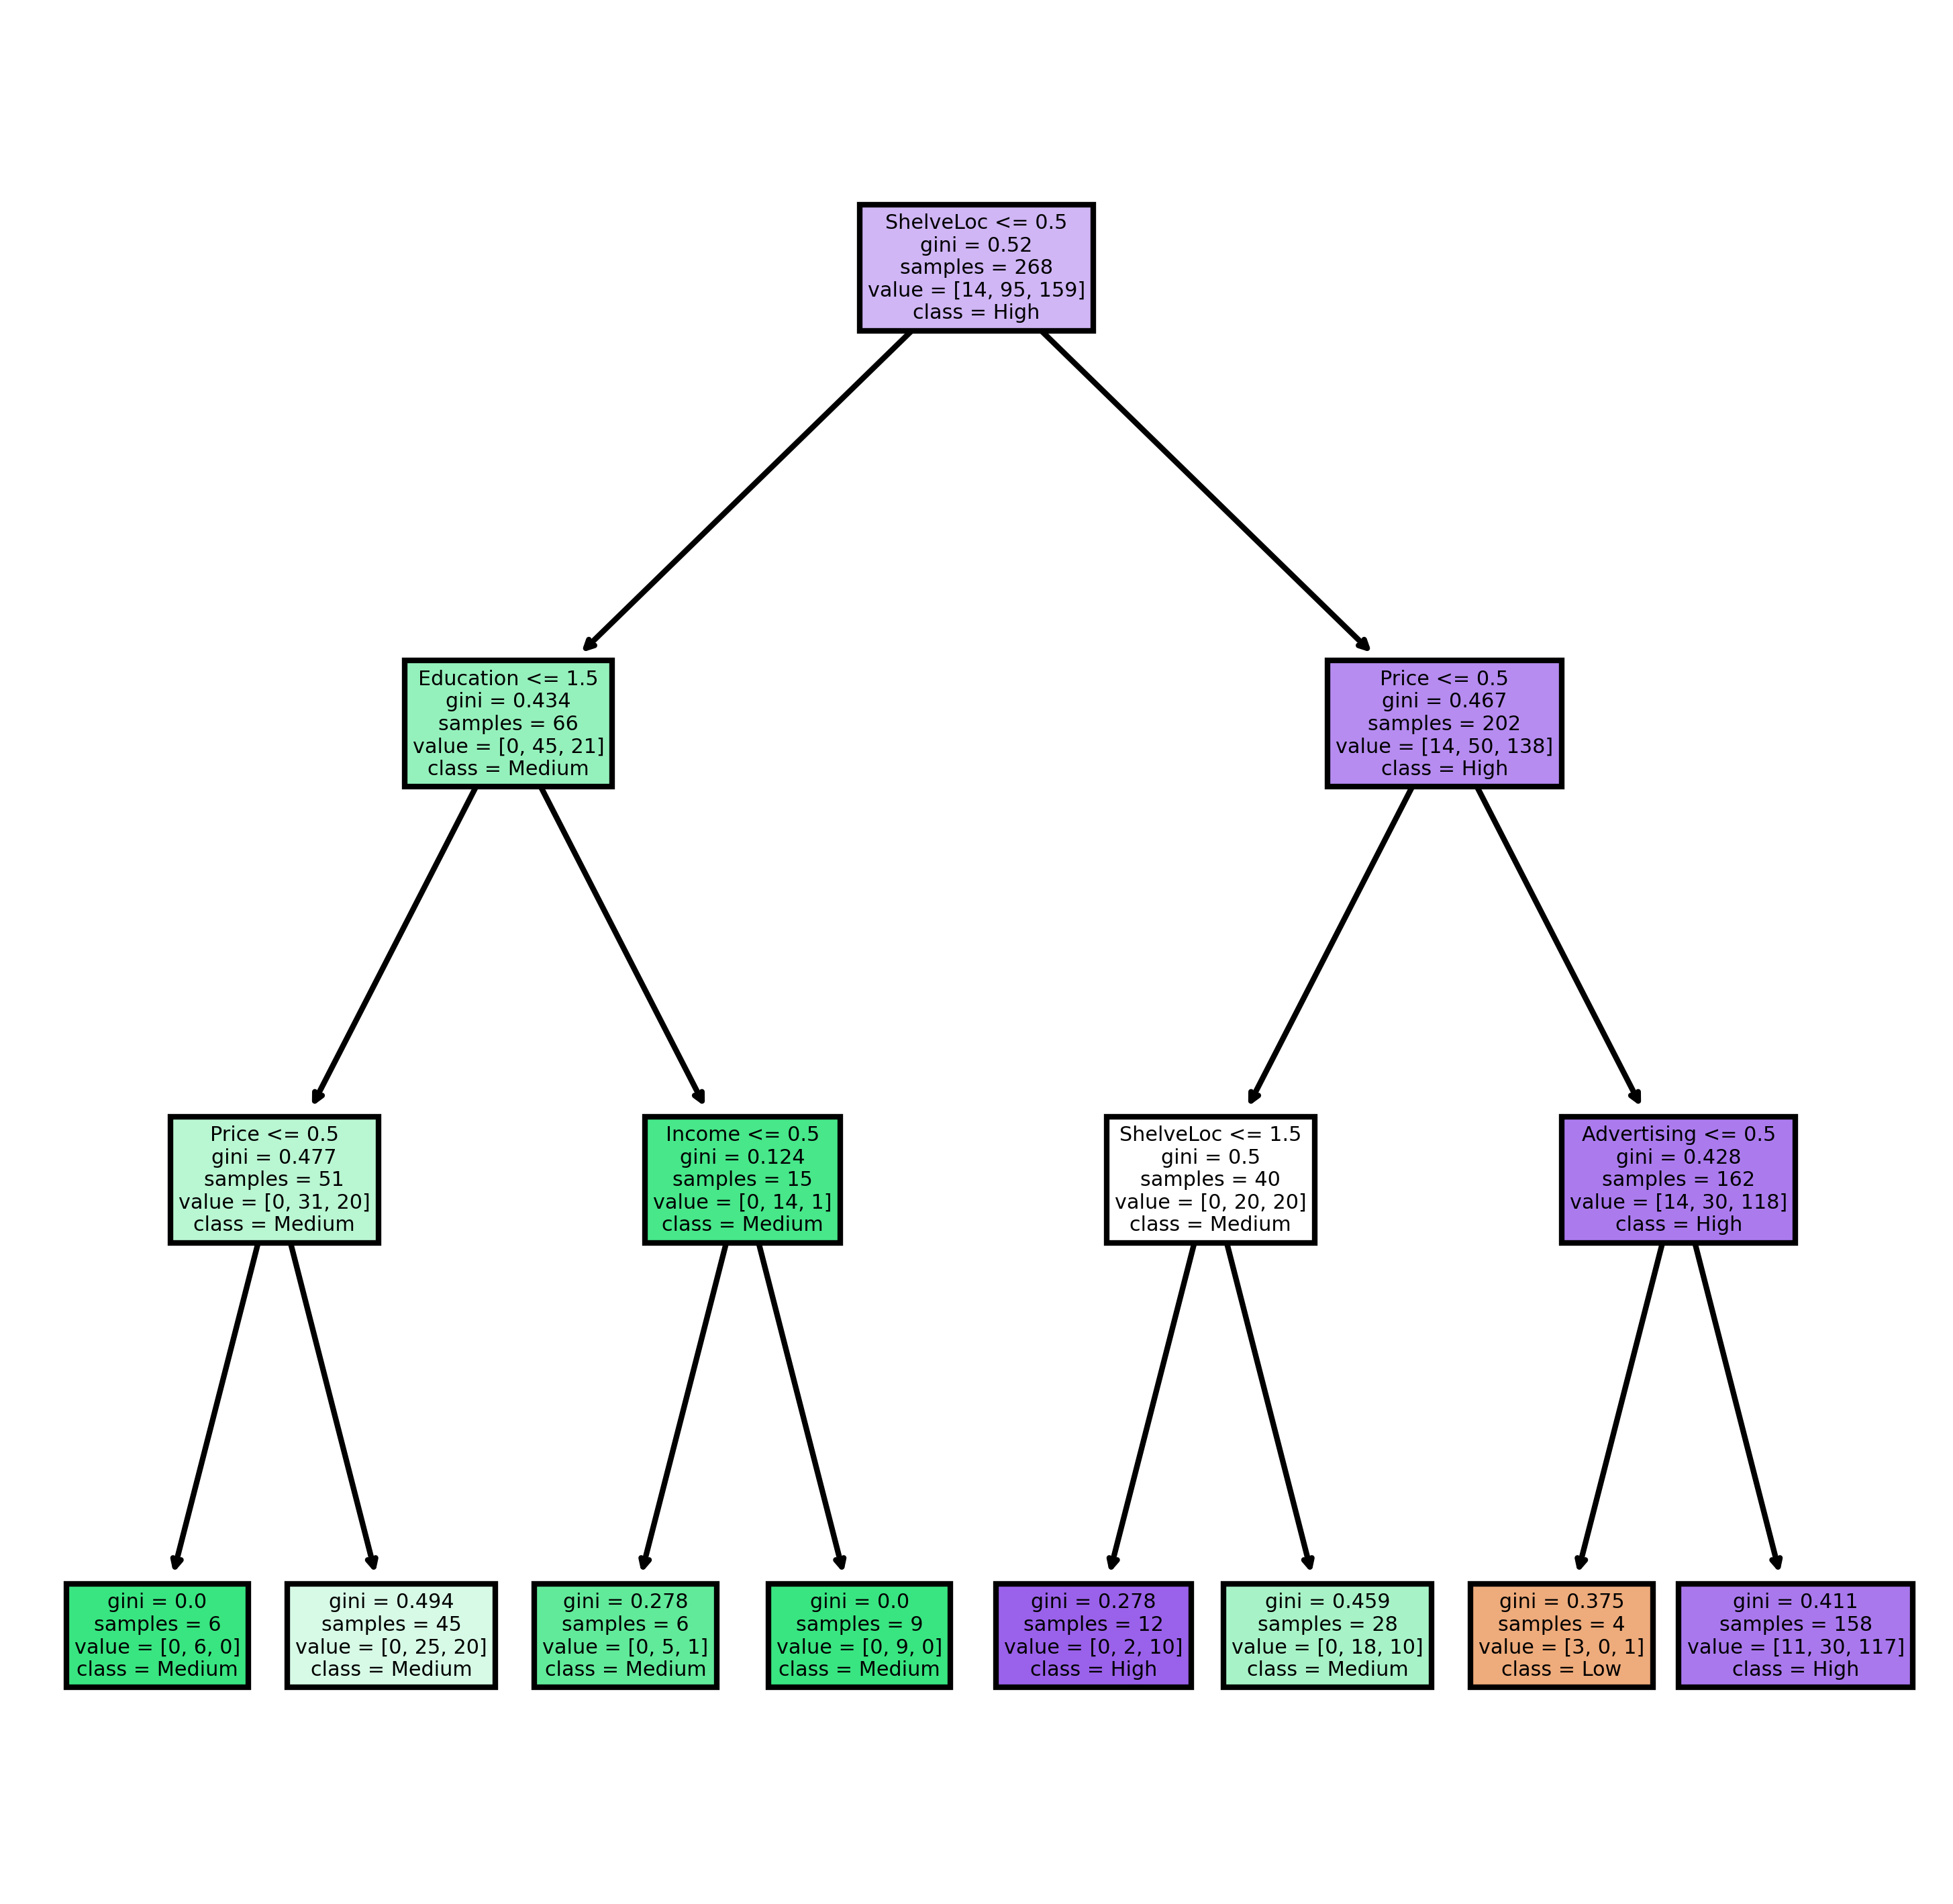

In [37]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [38]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    89
1    40
0     3
dtype: int64

In [39]:
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2])

In [40]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,13
1,1,22,12
2,2,18,64


In [41]:
# Checking accuracy of model
model_CART.score(x_test, y_test)


0.6515151515151515

# Fraud check Dataset

* Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

* Data Description :

* Undergrad : person is under graduated or not Marital.Status : marital status of a person Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government Work Experience : Work experience of an individual person Urban : Whether that person belongs to urban area or not

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# Loading Dataset
data = pd.read_csv('Fraud_check.csv')

# EDA & Data Preprocessing

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
# Renaming columns
data = data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
data.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


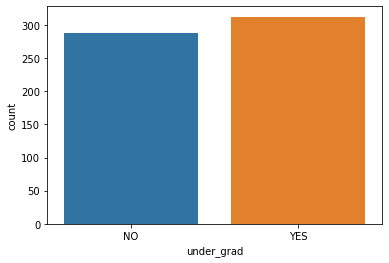

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


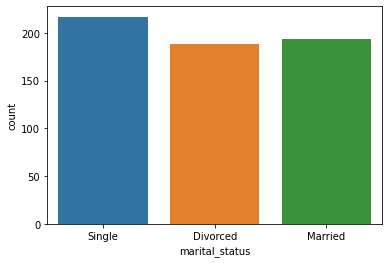

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


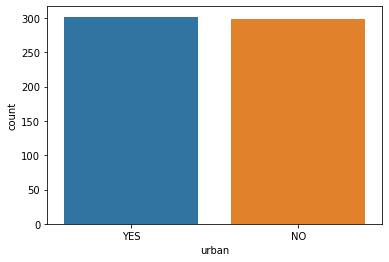

In [9]:
# checking count of categories for categorical columns colums
import seaborn as sns
sns.countplot(data['under_grad'])
plt.show()

sns.countplot(data['marital_status'])
plt.show()

sns.countplot(data['urban'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


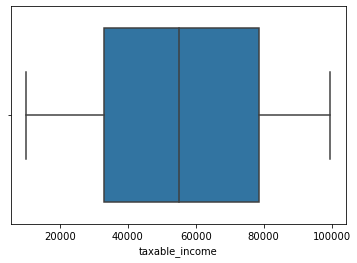

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


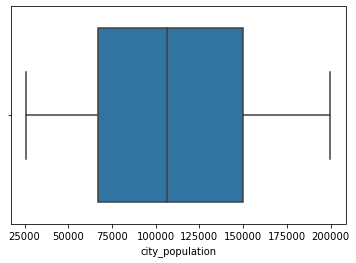

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


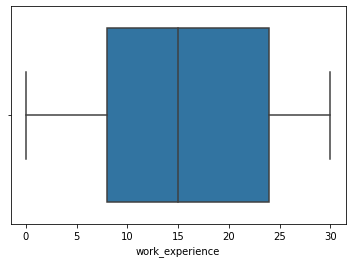

In [10]:
# Checking for outliers in numerical data
sns.boxplot(data['taxable_income'])
plt.show()

sns.boxplot(data['city_population'])
plt.show()

sns.boxplot(data['work_experience'])
plt.show()

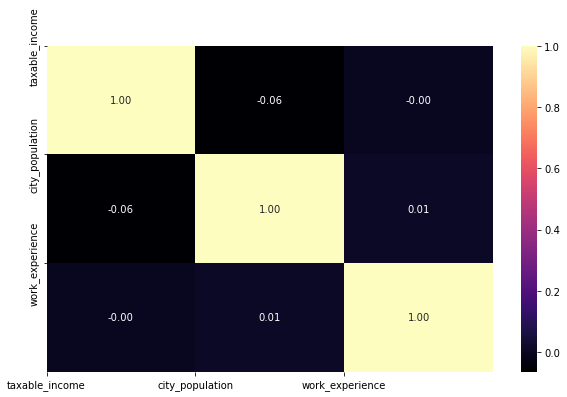

In [11]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [12]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['taxable_category'] = pd.cut(x = data['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='taxable_category', ylabel='count'>

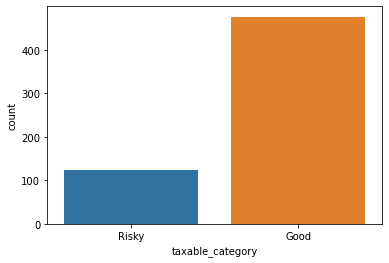

In [13]:
sns.countplot(data['taxable_category'])

In [14]:
data['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [15]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['under_grad'] = label_encoder.fit_transform(data['under_grad'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['urban'] = label_encoder.fit_transform(data['urban'])
data['taxable_category'] = label_encoder.fit_transform(data['taxable_category'])
data.sample(10)

,under_grad,marital_status,taxable_income,city_population,work_experience,urban,taxable_category
184,0,0,93307,70138,15,1,0
456,0,2,52862,53788,23,1,0
485,0,2,94772,52766,23,0,0
88,0,1,86652,63896,24,1,0
354,1,1,14422,176891,27,1,1
60,1,1,94418,91138,23,0,0
201,1,0,31088,58225,27,1,0
308,1,1,70949,183445,30,0,0
107,0,1,46629,52424,6,1,0
292,1,2,15710,76406,1,1,1


In [16]:
# dropping column taxable_income
data1 = data.drop('taxable_income', axis = 1)
data1

,under_grad,marital_status,city_population,work_experience,urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


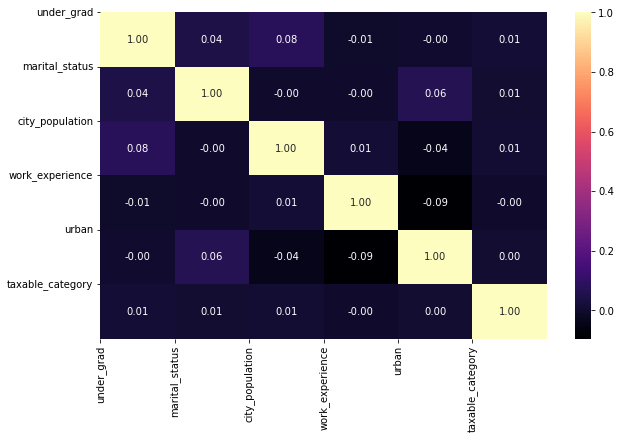

In [17]:
# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [18]:
# Dividing data into independent variables and dependent variable
X = data1.drop('taxable_category', axis = 1)
y = data1['taxable_category']

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int32

In [20]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [21]:
x_train

,under_grad,marital_status,city_population,work_experience,urban
509,0,1,65531,27,1
149,0,2,49505,25,0
124,1,0,139324,13,0
428,1,1,128266,24,1
465,0,0,116282,21,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [22]:
x_test

,under_grad,marital_status,city_population,work_experience,urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
231,1,2,153147,2,0
403,0,0,130912,27,1
278,0,1,114823,11,0
472,0,1,151963,11,1


In [23]:
y_train

509    1
149    0
124    0
428    1
465    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: taxable_category, Length: 402, dtype: int32

In [24]:
y_test

110    1
419    0
565    0
77     0
181    1
      ..
231    0
403    0
278    1
472    0
350    0
Name: taxable_category, Length: 198, dtype: int32

# Building model based on C5.0 Algorithm

In [25]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

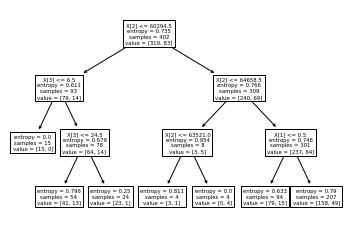

In [26]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [27]:
data1.columns

Index(['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category'],
      dtype='object')

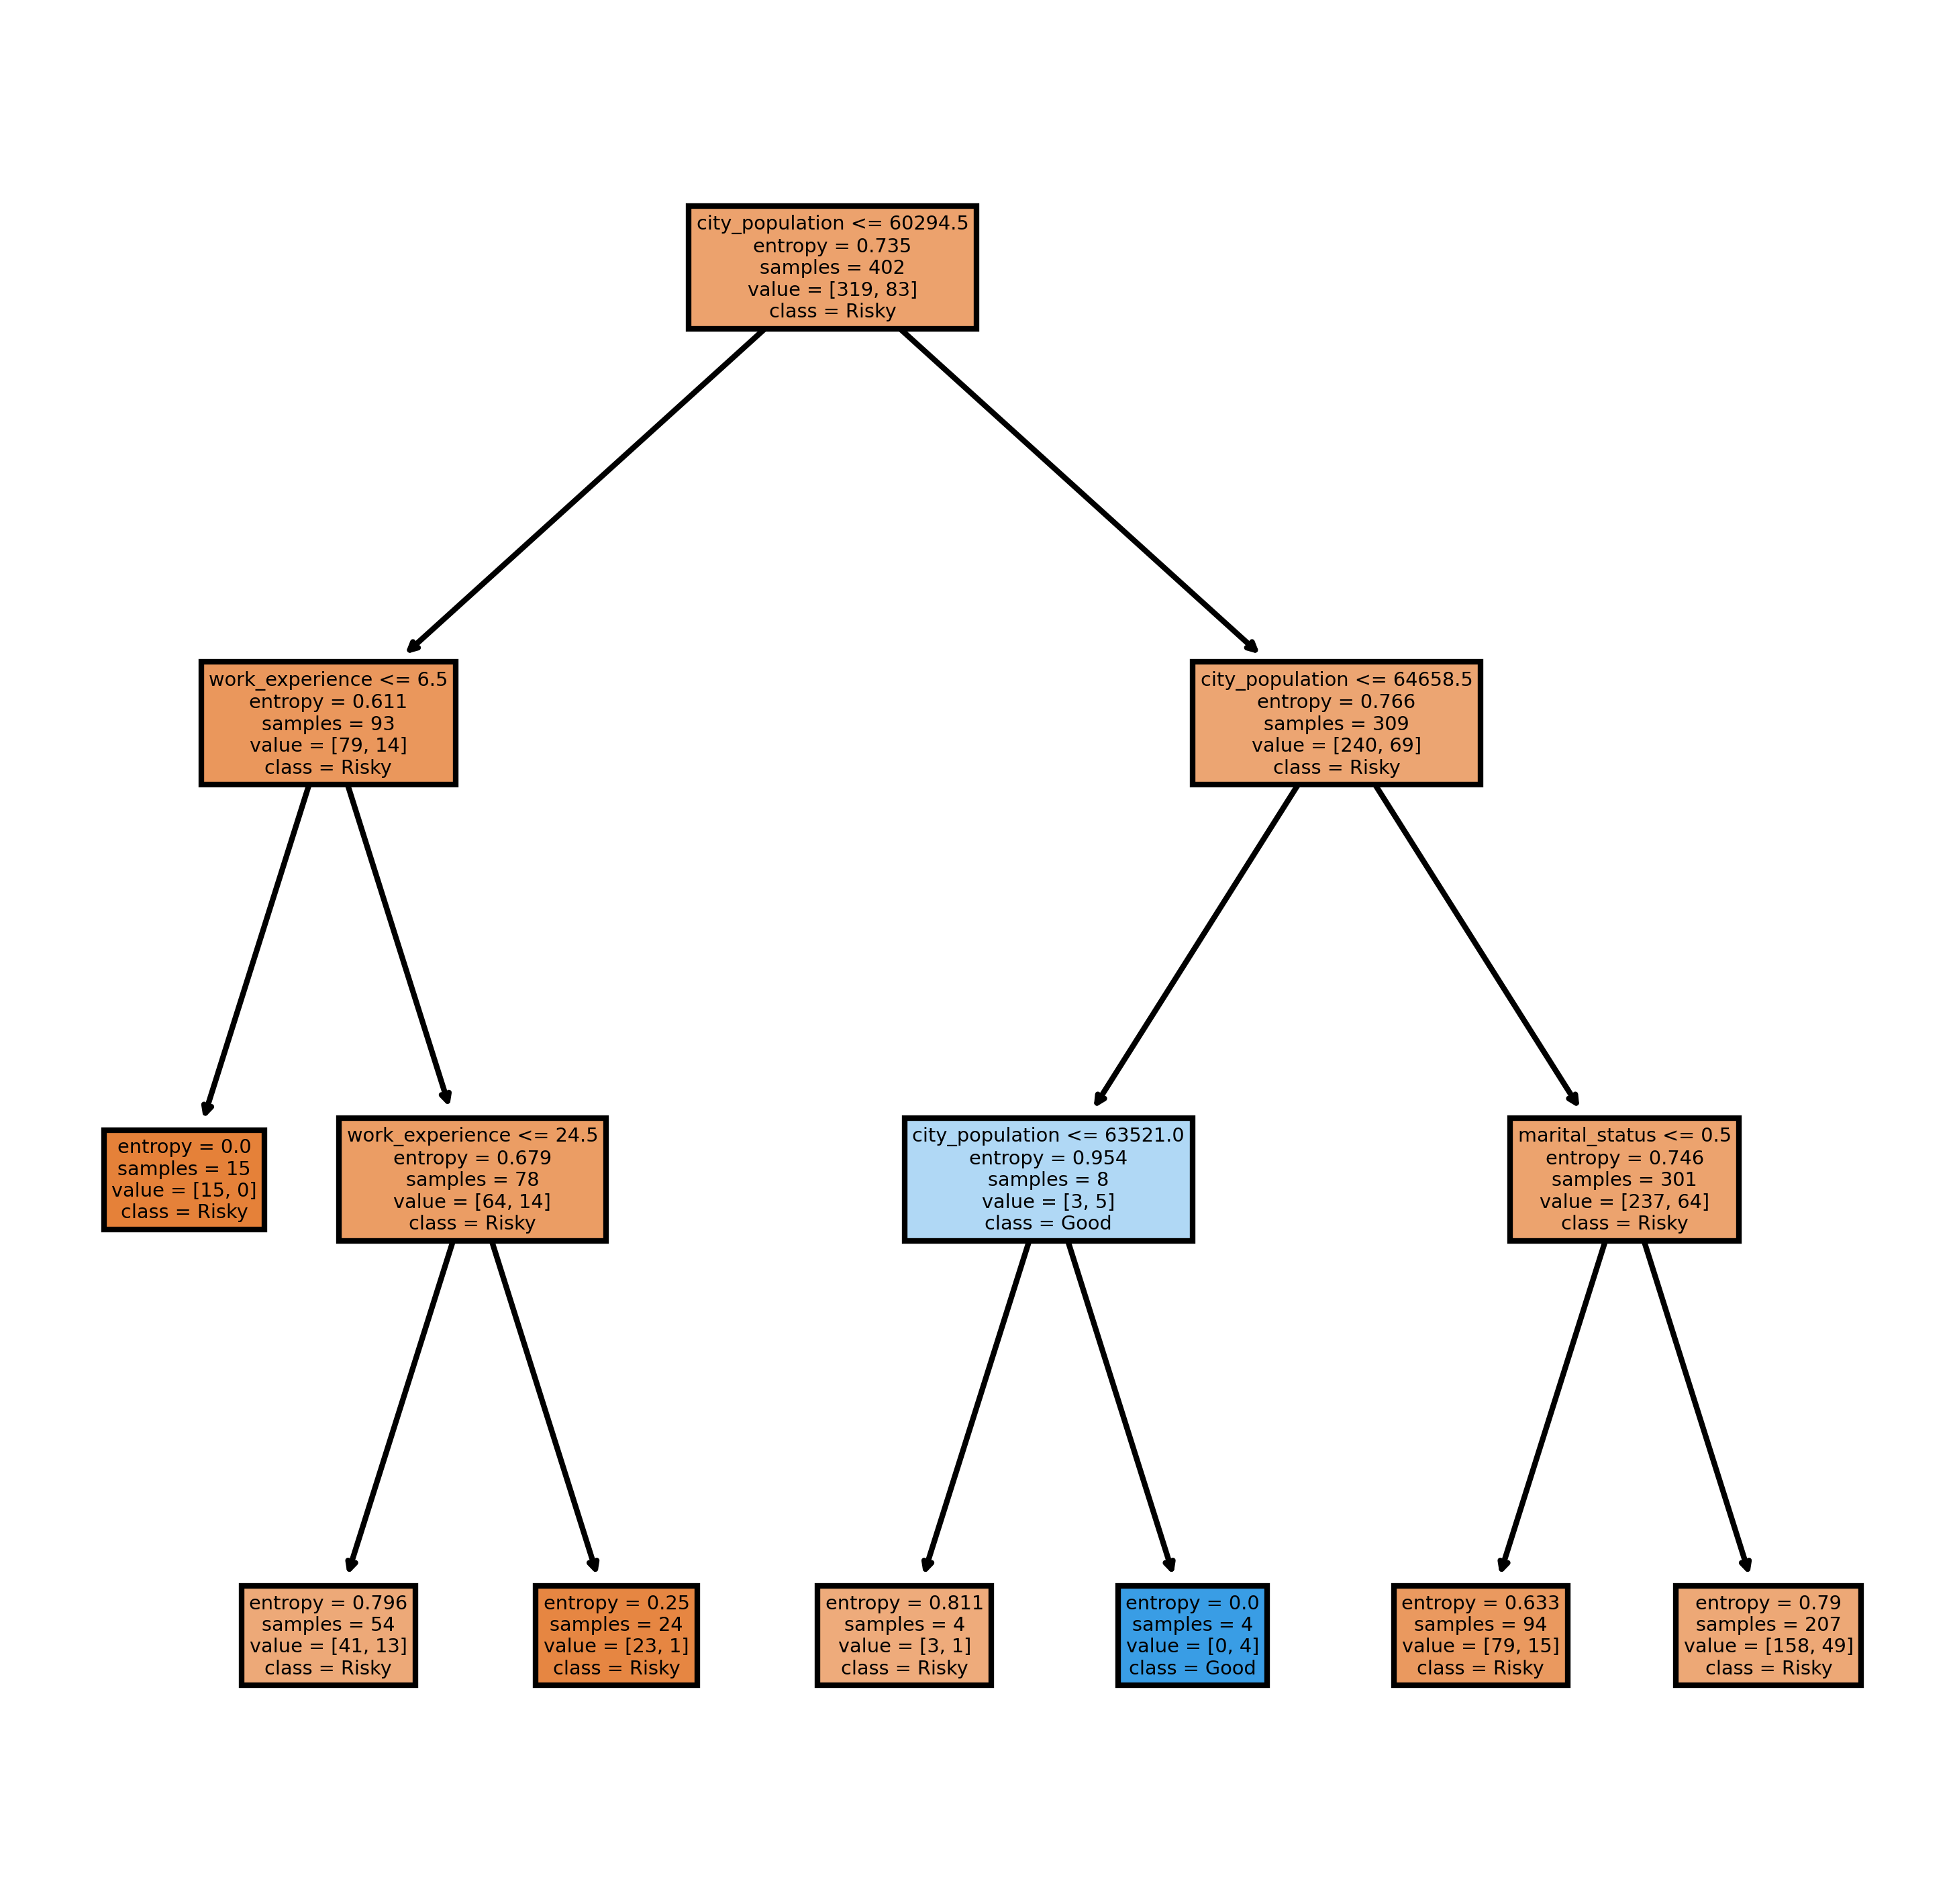

In [28]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

0    197
1      1
dtype: int64

In [30]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [32]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.7878787878787878

# Building model based on CART Algorithm

In [33]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

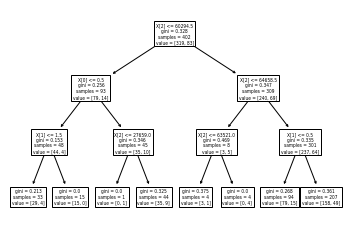

In [34]:
# Plotting Decision tree
tree.plot_tree(model_CART);


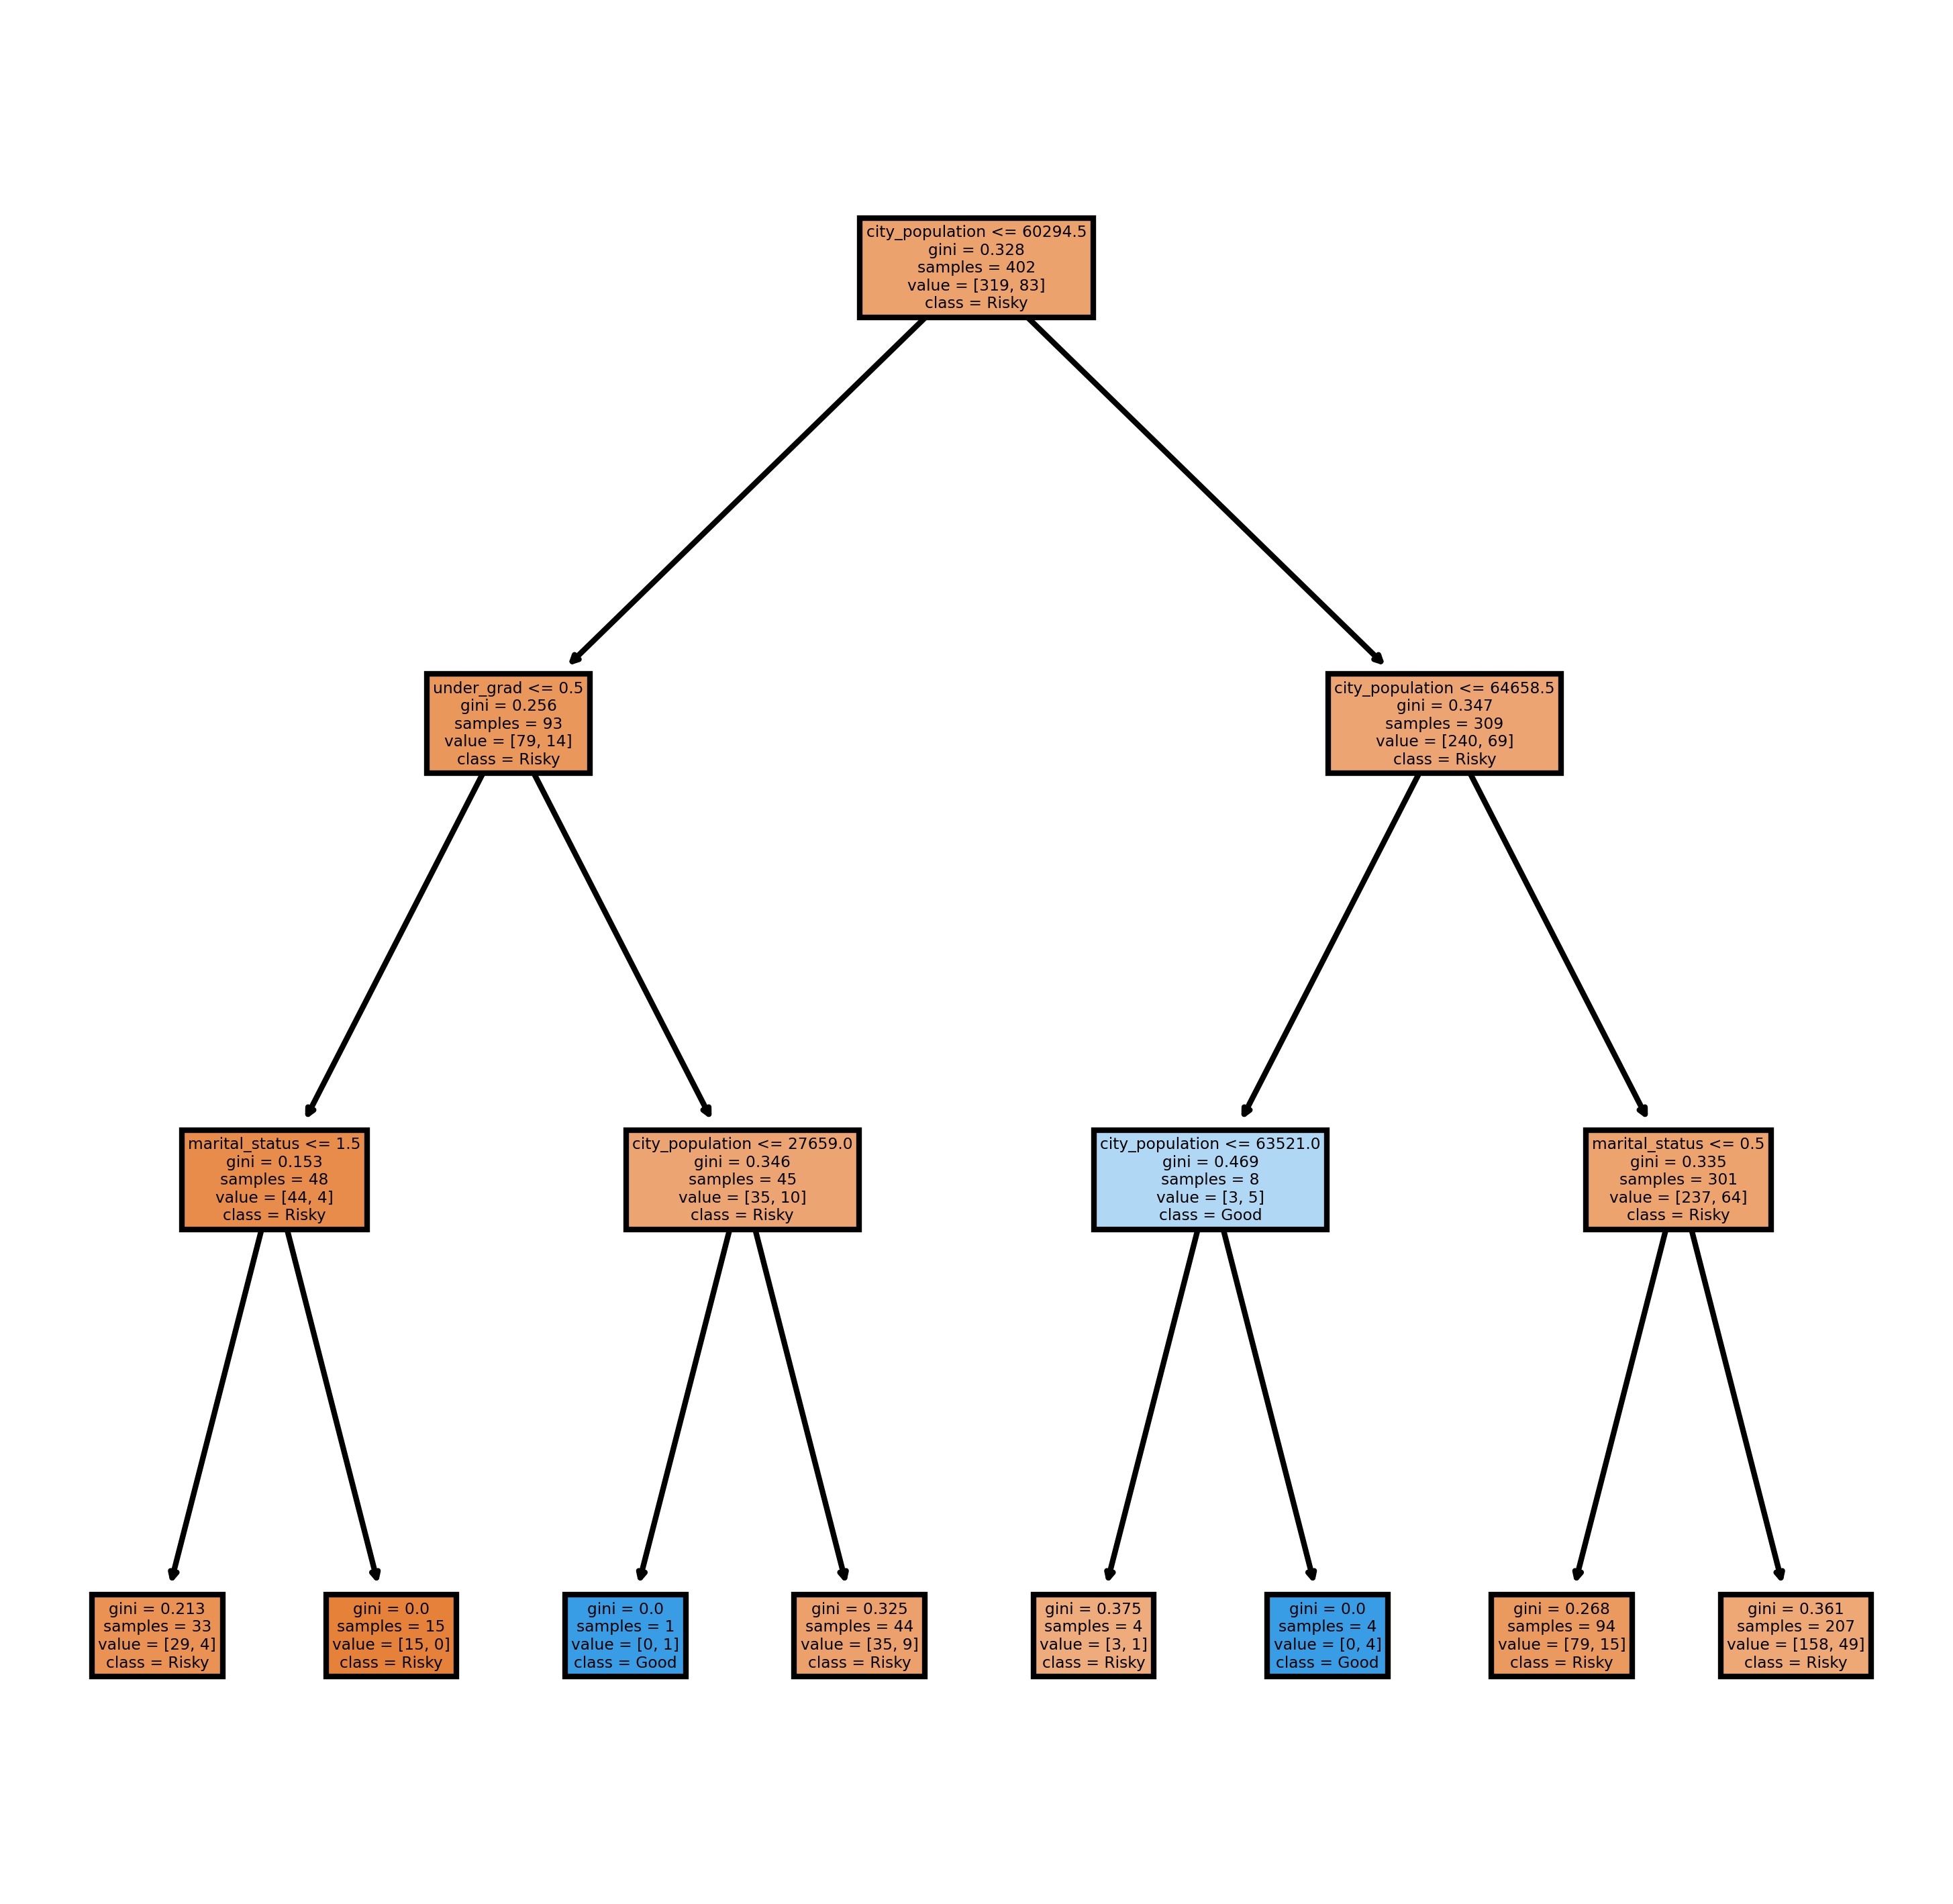

In [35]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

0    197
1      1
dtype: int64

In [37]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
taxable_category,,
0,156,1
1,41,0


In [39]:
# Checking accuracy of model
model_CART.score(x_test, y_test)


0.7878787878787878